# Benchmark Notebook

This notebook is used to benchmark the existing pipeline for feature selection using multiple benchmark datasets

In [3]:
from sklearn.datasets import load_breast_cancer
from shap.datasets import adult

benchmark_breast_cancer_X, benchmark_breast_cancer_y = load_breast_cancer(as_frame=True, return_X_y=True)

benchmark_breast_cancer_X.shape, benchmark_breast_cancer_y.shape

((569, 30), (569,))

In [4]:
# load the adult dataset

benchmark_adult_X, benchmark_adult_y = adult()

benchmark_adult_X.shape, benchmark_adult_y.shape

((32561, 12), (32561,))

In [2]:
from sklearn.datasets import make_regression

benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=1000, n_features=1000, n_informative=10, random_state=0)

# turn X and Y into dataframes

import pandas as pd

benchmark_regression_X = pd.DataFrame(benchmark_regression_X)

# turn to pd.series

benchmark_regression_y = pd.Series(benchmark_regression_y)





In [5]:
# turn columns into strings

benchmark_regression_X.columns = [str(i) for i in range(benchmark_regression_X.shape[1])]

benchmark_regression_X.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.084765,1.237148,0.130101,0.154898,-0.676024,-0.081947,0.641238,-0.154788,0.765215,-0.606001,...,-0.870153,1.194708,0.722042,-0.795280,-0.023182,-1.350349,-0.223828,0.510706,2.040819,0.941756
1,0.593602,0.486436,-0.325602,0.153472,-0.685815,0.490864,0.335730,-0.124691,-1.610125,-0.275904,...,-0.731246,-0.768045,0.236065,0.856283,-2.426735,-0.016661,-0.314094,1.894548,-0.800644,0.260231
2,0.506191,-1.735148,-2.781958,0.149985,0.116998,0.963722,-0.651163,-0.050181,0.458096,-0.026627,...,0.563683,-0.342342,-0.789264,0.304380,0.543953,1.375889,0.149494,-0.770951,0.333372,0.292224
3,-0.891875,-0.529014,-2.173289,0.312993,0.244659,-0.342185,0.360855,-1.891031,1.153390,1.866242,...,-0.483675,-0.083471,1.354622,0.565601,0.745887,1.329062,-1.343778,-0.043938,1.039362,1.638842
4,0.757861,0.372349,-1.505053,1.187030,0.158975,-0.384438,0.271868,-1.531922,2.476336,1.560857,...,-0.906083,-2.311178,0.506005,-1.466585,1.776045,-0.406498,0.520906,1.568772,-0.318681,1.505933


In [6]:
benchmark_regression_y.head()

0   -174.503553
1     44.361147
2    -34.902099
3    106.707707
4    -18.504495
dtype: float64

In [10]:
## Import all the models

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

from sklearn.ensemble import BaggingClassifier, BaggingRegressor

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.neural_network import MLPClassifier, MLPRegressor



In [17]:
# perform a simple train test split fitting 

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd
from sklearn.model_selection import train_test_split

n_samples = 1000
n_features = 1000
n_informative = 10
random_state = 0
model = ElasticNet()

benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
                                                                 n_features=n_features, 
                                                                 n_informative=n_informative, 
                                                                 random_state=random_state)

# turn X and Y into dataframes
benchmark_regression_X = pd.DataFrame(benchmark_regression_X)
benchmark_regression_y = pd.Series(benchmark_regression_y)

X = benchmark_regression_X
y = benchmark_regression_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# calculate the error

mse = mean_squared_error(y_test, y_pred)

# pearson correlation coefficient and p-value
corr, pval = pearsonr(y_test, y_pred)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')



MSE = 13530.9535, Correlation = 0.8837, p-value = 0.0000


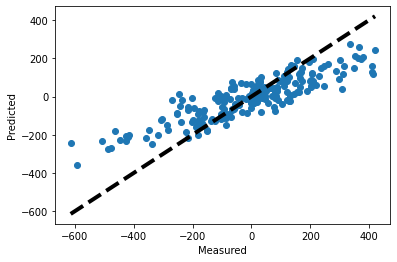

In [15]:
## plot y_test vs y_pred

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
# plot a line y=x

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

In [ ]:
collection_df = pd.DataFrame(columns=['model_name', 'mse', 'corr', 'pval', 'ypred', 'ytest'])

# n_samples = 1000
# n_features = 1000
# n_informative = 10
# random_state = 0
# model = ElasticNet()

# generate ranges of samples, features, informative features

sample_size = 1000
feature_to_sample_ratio = 10
n_informative_to_feature_ratio = 0.01